### ML Project Clustering

Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

I took help from the below github repository. https://github.com/jayahe/Project4_ClusterAnalysis/blob/master/Project_4_CA.ipynb
I have Understood the approach and then executed the code.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data=pd.read_csv("data_stocks.csv")

In [38]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [8]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [40]:
print("Shape - ", data.shape), print("Columns-",data.columns)

Shape -  (41266, 502)
Columns- Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)


(None, None)

In [41]:
data.drop(['DATE','SP500'],inplace=True,axis=1)

In [42]:
data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### Problem 1: Which all stocks are apparently similar in performance

In [43]:
corr=data.corr(method ='pearson') 
corr.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [44]:
corr[corr['NASDAQ.AAL'].values > 0.85][:5]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NYSE.DAL,0.908578,-0.016610,0.452003,0.194325,0.012064,0.537964,-0.444039,-0.056278,0.628435,0.170080,...,0.776583,-0.736920,0.200001,0.750989,0.051927,0.469302,0.278065,0.610742,0.662851,0.787479
NYSE.DE,0.850040,0.305125,0.677498,0.282661,0.463447,0.787228,-0.649532,0.083421,0.710929,0.205290,...,0.834250,-0.820615,0.571294,0.805954,-0.210496,0.630953,0.587302,0.802758,0.304364,0.809627
NYSE.IT,0.853073,0.160422,0.736381,0.167713,0.457620,0.706307,-0.510452,0.308601,0.679780,0.424158,...,0.863500,-0.885529,0.479655,0.856065,-0.304627,0.765642,0.626040,0.782576,0.506234,0.796625
NYSE.IVZ,0.859227,0.041431,0.617582,0.002995,0.332067,0.555323,-0.386931,0.332546,0.587207,0.422932,...,0.829449,-0.852430,0.329738,0.882239,-0.175056,0.729000,0.541157,0.692516,0.578577,0.727878


#### Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.
1. We will try to find the optimal number of clusters and assign each stock to a specific cluster

2. Calculate the average annual percentage return and volatilities over a theoritical one year period


In [45]:
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

#### let's find the right K using elbow  method

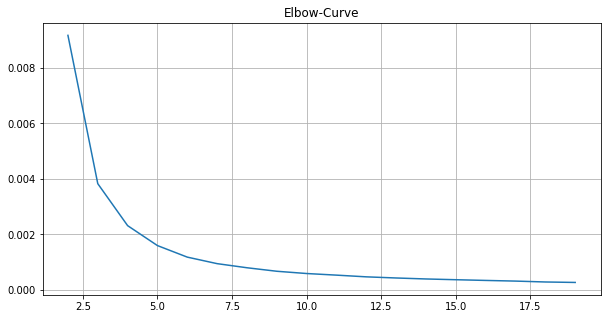

In [69]:
fig = plt.figure(figsize=(10,5
                         ))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

Curve has a steep at cluster no.4 or 5.

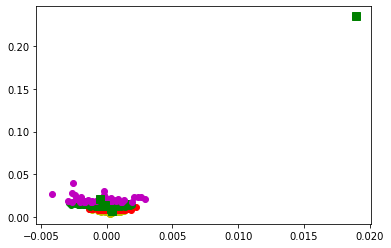

In [47]:
from pylab import plot, show
#let's take K=5
centroids,_= kmeans(dta, 5)

# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

Now let's delete the outlier so that we can know what is going on with other stocks with much more details.

In [49]:
#identify the outlier
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


In [50]:
returns.columns

Index(['Returns'], dtype='object')

In [51]:
data.drop(['NYSE.XRX'],inplace=True,axis=1)

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
 
# recreate data to feed into the algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

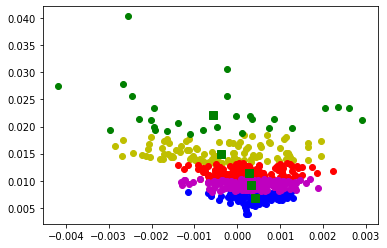

In [52]:
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)

# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

To know Which stock is actually in which cluster, We can carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format:

In [55]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]

[('NASDAQ.AAL', 1),
 ('NASDAQ.AAPL', 4),
 ('NASDAQ.ADBE', 4),
 ('NASDAQ.ADI', 2),
 ('NASDAQ.ADP', 2)]

In [56]:
df = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df.Cluster_No.value_counts()

4    150
2    127
1     97
0     97
3     28
Name: Cluster_No, dtype: int64

#### Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [57]:
data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,34.00,84.370,119.035,44.40,39.88,82.03,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,34.07,84.370,119.035,44.11,39.88,82.03,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,34.11,84.585,119.260,44.09,39.98,82.02,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,33.97,84.460,119.260,44.25,39.99,82.02,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,34.00,84.470,119.610,44.11,39.96,82.03,50.20,63.91,121.695,53.240


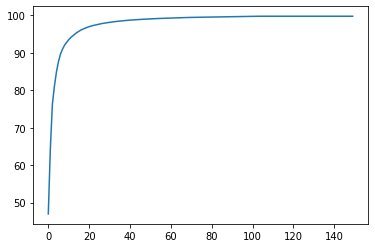

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = data.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(var1)

In [61]:
# consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.54489969   9.98399845  -9.36306484 ...   0.55492708   0.11237782
    2.42494753]
 [ 25.64396757   9.87058075  -9.78352591 ...   0.45727848   0.19997393
    2.31656228]
 [ 25.55832141   9.80326405  -9.65680691 ...   0.53351548   0.06603497
    2.06166646]
 ...
 [-22.74268953  13.34385803   6.52612773 ...  -2.13732045   1.2213657
   -0.33283463]
 [-22.58678189  13.43459792   6.63993624 ...  -2.12294014   1.22700825
   -0.35940272]
 [-22.69505715  13.37926134   6.56805244 ...  -2.16047195   1.20784726
   -0.31883712]]


In [62]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03932727 0.04119779 0.06302875 ... 0.06260427 0.00257534 0.05182548]
 [0.06427995 0.03397585 0.00193476 ... 0.02032991 0.08130274 0.05943219]
 [0.03996486 0.06394349 0.01187376 ... 0.02086513 0.06626943 0.02349888]
 ...
 [0.01117869 0.00454693 0.00478788 ... 0.01178861 0.04405162 0.0114408 ]
 [0.0745284  0.01903688 0.01012938 ... 0.00153322 0.01862527 0.04845711]
 [0.02237124 0.03314323 0.0366625  ... 0.0043289  0.0208781  0.02452633]]


In [64]:
comp = pd.DataFrame(pca.components_, columns = data.columns)
comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039327,-0.041198,-0.063029,-0.009854,-0.035888,-0.054813,0.050489,-0.035384,-0.044205,-0.014613,...,0.044324,-0.049520,0.057072,-0.054750,-0.050685,0.047282,-0.061482,-0.062604,0.002575,-0.051825
1,-0.064280,0.033976,0.001935,-0.032403,0.043516,-0.029425,0.016081,0.058270,-0.052583,0.012303,...,-0.022112,-0.058897,0.030257,0.013746,-0.040753,-0.052867,0.031522,-0.020330,-0.081303,-0.059432
2,-0.039965,0.063943,0.011874,0.043297,-0.037457,0.040367,-0.053789,-0.051299,0.030592,-0.086503,...,-0.046046,-0.003326,0.022205,0.059502,-0.034738,-0.028530,-0.004580,0.020865,-0.066269,0.023499
3,0.007225,0.077156,0.008401,-0.028080,-0.018027,0.008762,-0.032382,0.034501,0.051270,-0.078063,...,-0.054202,0.021500,0.061063,-0.039785,0.027499,0.012080,0.002698,-0.002802,-0.049638,0.015167
4,-0.033182,-0.017369,0.002557,-0.038106,-0.101883,-0.034799,-0.010965,0.037455,-0.039823,-0.013665,...,-0.081522,-0.036786,-0.011903,-0.030101,-0.012076,-0.045974,-0.002891,-0.001254,-0.003203,0.005309
